In [16]:
import pandas as pd 
import seaborn as sns
import plotly.express as px

In [10]:
exam_data = pd.read_csv('../data/StudentsPerformance.csv')
math_scores = exam_data['math score']

In [1]:
import pymc3 as pm
import theano.tensor as tt

## Discrete Analysis

In [19]:
math_scores.head()

0    72
1    69
2    90
3    47
4    76
Name: math score, dtype: int64

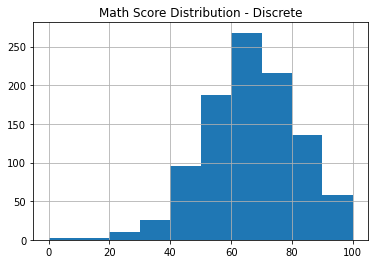

In [15]:
fig = math_scores.hist();
fig.set_title('Math Score Distribution - Discrete');

Our question: Have the math scores been trending up, down or not changing over time?  Perhaps a bar plot vs the index (sampling times) would do us better.

<AxesSubplot:ylabel='math score'>

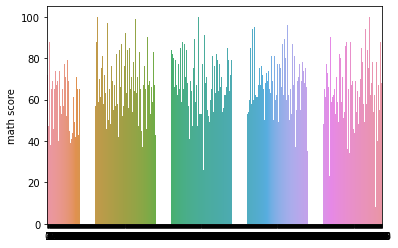

In [40]:
sns.barplot(x=np.arange(0, len(math_scores)), y=math_scores)

It doesn't **appear** that anything has changed.  Nevertheless, we should <font color="green">always check</font>

Remember our **expected value identity**

$$
E[\; Z \;|\; \lambda \;] = \frac{1}{\lambda}
$$

And also that

$$
\frac{1}{N}\sum_{i=0}^N \;C_i \approx E[\; \lambda \; |\; \alpha ] = \frac{1}{\alpha}
$$

We want to run a PDF on the value of $\lambda$, with our conventional alpha.

In [42]:
n = len(math_scores)
with pm.Model() as model:
    # Set alpha to the inverse of the data mean
    alpha = 1.0/math_scores.mean()
    
    # Set the lambdas at the switchpoint to the result of the PDF
    lambda_1 = pm.Exponential("lamba_1", alpha)
    lambda_2 = pm.Exponential("lambda_2", alpha)
    
    tau = pm.DiscreteUniform("tau", lower=0, upper=n - 1)

In [43]:
model 

This code has essentially made `lambda` a random variable, or a *stochastic* variable.  Now, we can use the `switch()` function to assign `lambda_1` or `lambda_2` based on what side of `tau` we are on.

In [44]:
with model:
    idx = np.arange(n)
    lambda_ = pm.math.switch(tau > idx, lambda_1, lambda_2)

In [45]:
model

In [4]:
from IPython.core.display import HTML
def css_styling():
    styles = open("../../jupyter-styles/custom.css", "r").read()
    return HTML(styles)
css_styling()